<a href="https://colab.research.google.com/github/dreamtx01/Springboard/blob/master/Capstone_ML_RFE_NCAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES**

In [1]:
# This cell is to import the libraries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest,RFECV
from sklearn.feature_selection import chi2
from sklearn.metrics import f1_score,confusion_matrix
print("Beginning")

Beginning


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Function used to generate accuracy and heatmap for chi2,  RFE and Grid CV**

In [0]:
def generate_accuracy_and_heatmap(model,X,y):
  cm = confusion_matrix(y,model.predict(X))
  sns.heatmap(cm,annot=True,fmt="d")
  ac=accuracy_score(y,model.predict(X))
  f_score=f1_score(y,model.predict(X))
  print("Accuracy is: ",ac)
  print("F1 score is: ",f_score)
 
  return 

**Loading Regular Season Data and associated team names**

In [0]:
# This is to load the regular season detailed results and the Team spellings
capstone = pd.read_csv("RegularSeasonDetailedResults.csv")
cap = pd.read_csv("TeamSpellings.csv",encoding="latin")


In [0]:
#This will help associate a name to a team ID
dic = {}
for i in range(0,len(cap["TeamID"])):
    dic[cap["TeamID"][i]]=cap['TeamNameSpelling'][i]
capstone["WTeamName"]=[dic[teamid] for teamid in capstone['WTeamID']]
capstone["LTeamName"]=[dic[teamid] for teamid in capstone['LTeamID']]


In [5]:
capstone.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WTeamName,LTeamName
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,alabama,oklahoma
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,memphis,syracuse
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,marquette,villanova
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,northern-illinois,winthrop
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,texas,georgia


**Dropping the neutral Location so as to use home and away as target variable**

In [0]:

Neutral =capstone.loc[capstone.WLoc== "N",:]
Neutral=capstone[capstone['WLoc']=='N'].index
newcapstone=capstone.drop(Neutral)

**Picking the best features for the Logistic Regression, use all variables, but drop WLOC,Season,NumOT, WTeamName,LTeamName. Create a new dataframe called newcapstone for target variable and newcapstonewoloc for independent variable**


In [0]:
#Define y:  y= WLoc Set Home =1 and Way = 0
newcapstone['WLoc2'] = [1 if val == 'H' else 0 for val in newcapstone['WLoc']]
y=newcapstone.WLoc2

In [8]:
#Define X: Dataframe without WLOC
newcapstonewowloc =newcapstone.drop(['WLoc','WTeamName','LTeamName',"WLoc2","DayNum","Season","WTeamID","LTeamID","NumOT"], axis=1)
X=newcapstonewowloc
newcapstonewowloc.head()

,WScore,LScore,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
5,81,55,26,57,6,12,23,27,12,24,12,9,9,3,18,20,46,3,11,12,17,6,22,8,19,4,3,25
6,80,62,23,55,2,8,32,39,13,18,14,17,11,1,25,19,41,4,15,20,28,9,21,11,30,10,4,28
9,84,56,32,67,5,17,15,19,14,22,11,6,12,0,13,23,52,3,14,7,12,9,23,10,18,1,3,18
10,106,50,41,69,15,25,9,13,15,29,21,11,10,6,16,17,52,4,11,12,17,8,15,8,17,7,3,15
13,76,48,25,56,10,23,16,23,8,35,18,13,14,19,13,18,64,8,24,4,8,14,26,12,17,10,0,17


**Using Logistic Regression to calculate mean of accuracy scores**

In [0]:
logreg = LogisticRegression(solver='lbfgs')

In [10]:
cross_val_score(logreg,X,y,cv=5,scoring='accuracy').mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7284687372846873

In [11]:
#Checking shape of X and compare with Y so that they are same
#X = X.values
print("X: ", type(X), X.shape)


X:  <class 'pandas.core.frame.DataFrame'> (73730, 28)


In [12]:
y = (newcapstone.WLoc == "H").values
print("y: ", type(y), y.shape)
print("y.WLoc2 shape: ", y.shape)

y:  <class 'numpy.ndarray'> (73730,)
y.WLoc2 shape:  (73730,)


In [0]:
# Split the data into a training and test set.
# By default train_test_split splits to 75% train and 25% test
# Random state set to a fixed number wil guarantee 
# that the output of Run 1 will be equal to the output of Run 2, 
# i.e. your split will be always the same
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state=5)

In [14]:
print("\n")
print("Xlr:", Xlr, type(Xlr), Xlr.shape, len(Xlr)) #TrainX



Xlr:        WScore  LScore  WFGM  WFGA  WFGM3  ...  LAst  LTO  LStl  LBlk  LPF
37572      73      62    24    47      7  ...    13   10     8     2   17
65975      86      48    32    65      5  ...    10   12     7     1   20
56888      97      85    30    62      3  ...    14   22     3     0   31
44799      62      46    24    53      7  ...     9   16     3     3   16
21054      81      55    31    55      5  ...    10   19     3     2   15
...       ...     ...   ...   ...    ...  ...   ...  ...   ...   ...  ...
65996      90      85    30    75      9  ...    18   11     1     7   24
6143       59      55    19    52      4  ...     8   11    10     2   23
22473      62      58    22    49      7  ...    14   12     4     2   20
20647      73      64    28    65      6  ...    16   17     9     3   17
39467      69      64    21    45      6  ...    15   16     6     0   25

[55297 rows x 28 columns] <class 'pandas.core.frame.DataFrame'> (55297, 28) 55297


In [15]:

print("\n")
print("Xtestlr", Xtestlr, type(Xtestlr), Xtestlr.shape, len(Xtestlr)) #TestX



Xtestlr        WScore  LScore  WFGM  WFGA  WFGM3  ...  LAst  LTO  LStl  LBlk  LPF
4977       63      54    21    50      1  ...    12   28     6     6   26
35549      69      65    19    50      6  ...    13   17    12     1   22
22942      55      53    21    57      6  ...     8   13     7     5   16
75574      96      61    32    63     10  ...    12   15     7     0   23
73679      83      81    21    58      6  ...    12   16     2     4   29
...       ...     ...   ...   ...    ...  ...   ...  ...   ...   ...  ...
2692       64      62    21    55      5  ...     8   14     7     3   26
54226      81      62    27    52      8  ...    11   15     6     2   21
60831      65      55    21    42      4  ...     8   20    11     3   23
67199      71      53    23    56     14  ...     9   17     3     4   15
75934      73      64    26    59     10  ...    14   14     9     4   17

[18433 rows x 28 columns] <class 'pandas.core.frame.DataFrame'> (18433, 28) 18433


In [16]:
print("\n")
print("ylr", ylr, type(ylr), ylr.shape, len(ylr)) #Trainy



ylr [ True  True  True ... False  True  True] <class 'numpy.ndarray'> (55297,) 55297


In [17]:
# 
print("\n")
print("ytestlr", ytestlr, type(ytestlr), ytestlr.shape, len(ytestlr)) #Testy



ytestlr [ True  True  True ...  True False  True] <class 'numpy.ndarray'> (18433,) 18433


In [18]:
logreg.fit(Xlr, ylr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 **Print Accuracy Score Baseline**

In [19]:
# Print the accuracy from the testing data.
#  introduce variable to be reused later
y_predict_test = logreg.predict(Xtestlr)
print("\n")
print("[Test] Accuracy score (y_predict_test, ytestlr):",accuracy_score(y_predict_test, ytestlr))



[Test] Accuracy score (y_predict_test, ytestlr): 0.7264688330711224


**Picking the best Features for the Logistic Regression using Chi2 and select best** 

In [20]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)

[1.400e+03 6.886e+02 2.815e+02 2.773e+02 3.634e+00 2.871e+02 1.364e+03
 2.234e+03 5.959e+02 2.930e+01 3.146e+03 3.393e+02 6.516e+02 2.545e+03
 1.553e+03 2.305e+01 2.572e+00 4.039e+01 1.434e+01 2.627e+03 3.516e+03
 1.181e+02 1.452e+00 1.031e+03 1.680e+03 3.121e+01 1.675e+03 1.061e+03]


In [21]:
selected_chi2_features=pd.DataFrame({'Feature':list(Xlr.columns),'Ranking':fit.scores_})
selected_chi2_features.sort_values(by="Ranking",ascending=False)

# The highest chi2 values  are the most important features

,Feature,Ranking
20,LFTA,3516.050289
10,WAst,3146.441975
19,LFTM,2626.531772
13,WBlk,2545.216587
7,WFTA,2233.710387
24,LTO,1679.586175
26,LBlk,1675.223679
14,WPF,1553.292806
0,WScore,1399.981293
6,WFTM,1364.284639


Accuracy is:  0.6824174035696848
F1 score is:  0.7879753712423034


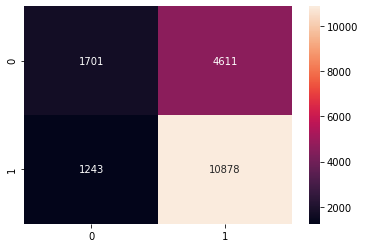

In [22]:
x_train_chi=fit.transform(Xlr)
x_test_chi=fit.transform(Xtestlr)

lr_chi_model=logreg.fit(x_train_chi,ylr)
generate_accuracy_and_heatmap(lr_chi_model,x_test_chi,ytestlr)

**Picking the best Features for the Logistic Regression using RFE** 


In [0]:
#Define y:  y= WLoc Set Home =1 and Way = 0
newcapstone['WLoc2'] = [1 if val == 'H' else 0 for val in newcapstone['WLoc']]
y=newcapstone.WLoc2

In [0]:
#Define X: Dataframe without WLOC
newcapstonewowloc =newcapstone.drop(['WLoc','WTeamName','LTeamName',"WLoc2","DayNum","Season","WTeamID","LTeamID","NumOT"], axis=1)
X=newcapstonewowloc

In [25]:
rfe=RFE(estimator=logreg,step=1)
rfe=rfe.fit(Xlr,ylr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [26]:
selected_rfe_features=pd.DataFrame({'Feature':list(Xlr.columns),'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by="Ranking")

# All the features with the value 1 are the most important features

,Feature,Ranking
13,WBlk,1
25,LStl,1
24,LTO,1
23,LAst,1
21,LOR,1
19,LFTM,1
14,WPF,1
26,LBlk,1
12,WStl,1
11,WTO,1


In [0]:
x_train_rfe=rfe.transform(Xlr)
x_test_rfe=rfe.transform(Xtestlr)

In [0]:
lr_rfe_model=logreg.fit(x_train_rfe,ylr)

Accuracy is:  0.7284218521130581
F1 score is:  0.8087999388893133


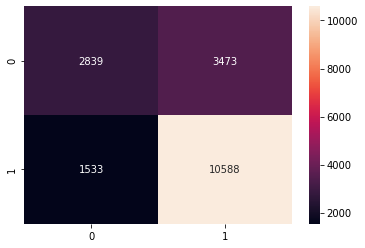

In [29]:
generate_accuracy_and_heatmap(lr_rfe_model,x_test_rfe,ytestlr)

**Recursive Feature Elimination with Cross Validation**







In [30]:
rfecv=RFECV(estimator=logreg,cv=5,scoring='accuracy')
rfecv=rfecv.fit(Xlr,ylr)
print('Optimal number of features: ',rfecv.n_features_)
print("Best features:",Xlr.columns[rfecv.support_])



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Optimal number of features:  26
Best features: Index(['WScore', 'LScore', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
rfecv.grid_scores_

array([0.662, 0.669, 0.691, 0.705, 0.71 , 0.715, 0.719, 0.723, 0.725,
       0.726, 0.728, 0.726, 0.728, 0.728, 0.729, 0.729, 0.729, 0.728,
       0.729, 0.729, 0.729, 0.729, 0.729, 0.729, 0.729, 0.729, 0.729,
       0.729])

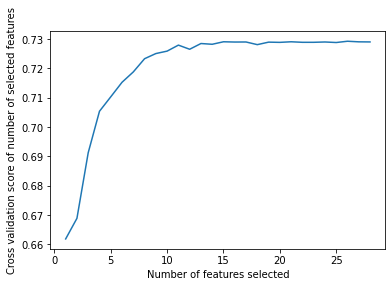

In [32]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

In [0]:
x_train_rfecv=rfecv.transform(Xlr)
x_test_rfecv=rfecv.transform(Xtestlr)

In [34]:
lr_rfecv_model=logreg.fit(x_train_rfecv,ylr)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy is:  0.727011338360549
F1 score is:  0.808319366143532


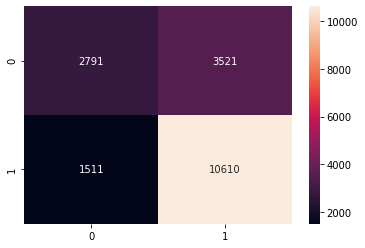

In [35]:
generate_accuracy_and_heatmap(lr_rfecv_model,x_test_rfecv,ytestlr)

**Train Test Split, using the 15 variables from RFE with cross validation. 75%/25% with 1000 trials**

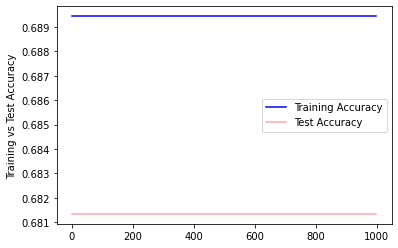

In [36]:
# we try multiple splits and see the effects, with the same proportion 75% train and 25% test

# keep lists for training accuracy, test accuracy, and the difference
# between the latter and the former
training_accuracy = []
test_accuracy = []
accuracy_difference = []

# define number of trials
n_splits = 1000

# define LogisticRegression object
clf = LogisticRegression()

# loop over multiple trials
for i in range(0, n_splits):
    # do split for this iteration, using shuffle and a different random_state 
    # for every iteration
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(capstone[['WBlk','LStl',"LTO","LAst","LOR","LFTM","WPF","LBlk","WStl","WTO","LPF","WOR","WFGM3","WAst"]].values, 
                                              (capstone.WLoc == "H").values,random_state=5)
    # fit on the training set
    clf.fit(Xlr, ylr)
    
    # predict on training set
    y_predict_training = clf.predict(Xlr)
    
    # predict on test set
    y_predict_test = clf.predict(Xtestlr)
    
    # save training accuracy for this split
    tr_accuracy = accuracy_score(y_predict_training, ylr)
    training_accuracy.append(tr_accuracy)
    
    # save test accuracy for this split
    tst_accuracy = accuracy_score(y_predict_test, ytestlr)
    test_accuracy.append(tst_accuracy)
    
    # save difference
    accuracy_difference.append(tst_accuracy - tr_accuracy)
#end for
#
# plot both curves
# ref: https://matplotlib.org/users/pyplot_tutorial.html
# parameter alpha below is a percentage of transparency
# ref: https://matplotlib.org/users/legend_guide.html
training_plot, = plt.plot(training_accuracy, 'b')
test_plot, = plt.plot(test_accuracy, 'r', alpha = 0.35)
plt.legend([training_plot, test_plot], ['Training Accuracy', 'Test Accuracy'])
plt.ylabel('Training vs Test Accuracy')
plt.show()

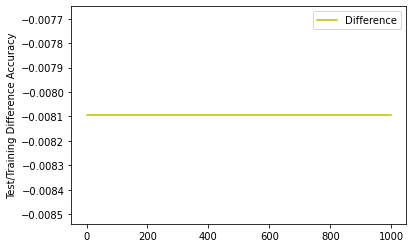

In [37]:
#  show accuracy difference plot
diff_plot, = plt.plot(accuracy_difference, 'y')
plt.legend([diff_plot], ['Difference'])
plt.ylabel('Test/Training Difference Accuracy')
plt.show()

In [38]:
# use sklearn.metrics.classification_report for a more comprehensive
# performance analysis


from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report]")
print(classification_report(ylr, y_predict_training))

print("[Test Classification Report]")
print(classification_report(ytestlr, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

       False       0.65      0.52      0.58     24985
        True       0.71      0.81      0.76     36545

    accuracy                           0.69     61530
   macro avg       0.68      0.66      0.67     61530
weighted avg       0.68      0.69      0.68     61530

[Test Classification Report]
              precision    recall  f1-score   support

       False       0.63      0.52      0.57      8372
        True       0.70      0.80      0.75     12139

    accuracy                           0.68     20511
   macro avg       0.67      0.66      0.66     20511
weighted avg       0.68      0.68      0.67     20511



In [39]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob

y_pred_prob = clf.predict_proba(Xtestlr)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_predict_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(clf,X,y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


AUC scores computed using 5-fold cross-validation: [0.785 0.771 0.761 0.759 0.749]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob

y_pred_prob = clf.predict_proba(Xtestlr)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_predict_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(clf,X,y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


AUC scores computed using 5-fold cross-validation: [0.785 0.771 0.761 0.759 0.749]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0.5, 1.0, 'ROC Curve')

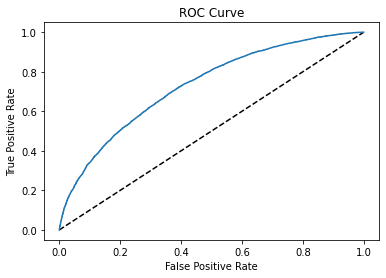

In [41]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(Xtestlr)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(ytestlr, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [42]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l2']}



# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Tuned Logistic Regression Parameters: {'C': 31.622776601683793, 'penalty': 'l2'}
Best score is 0.7287264342872644


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:

# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=5)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(Xlr, ylr)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(Xtestlr)
r2 = gm_cv.score(Xtestlr, ytestlr)
mse = mean_squared_error(ytestlr, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5048.967939981411, tolerance: 1.1870691187225826
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5045.246826388408, tolerance: 1.1877435702096415
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5036.796395976483, tolerance: 1.1861236449699668
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5050.8406

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.15088979796681135
Tuned ElasticNet MSE: 0.20511740845123616


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6311.804540971662, tolerance: 1.4839538842841302
  positive)


In [0]:
newcapstonewowloc

In [0]:
x_new=[[80,10,12,14,15,17,18,19,23,24,24,67,87,99,76,87,45,34,44,56,78,67,54,55,34,56,57,78]]

In [0]:
logreg_cv.predict(x_new)